In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')
% matplotlib inline
%load_ext autoreload
% autoreload

In [3]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15",18,1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32",35,1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [4]:
data_asso_2Hz_reci = data[(data['Ptl_note']=='E_I_2Hz_associative')&(data['Reci']==1)&(data['Age']>=25)]

In [ ]:
data_asso_2Hz_reci

<Container object of 3 artists>

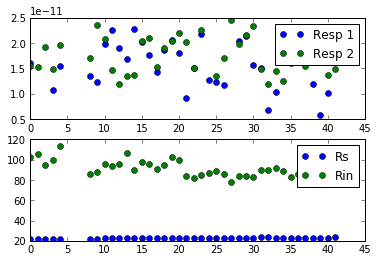

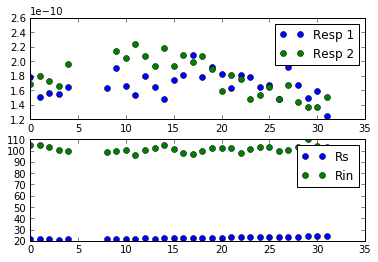

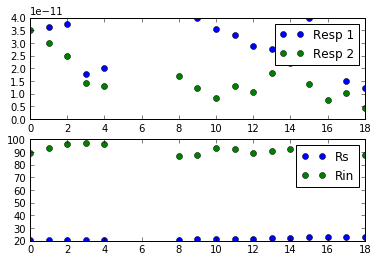

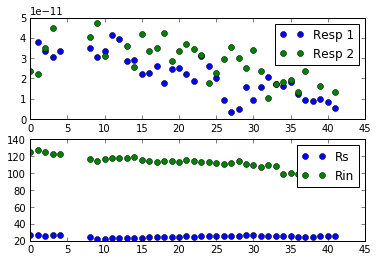

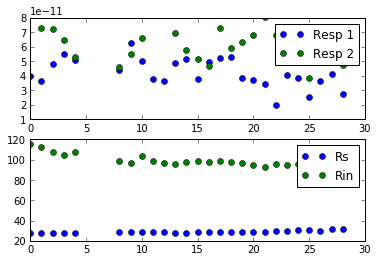

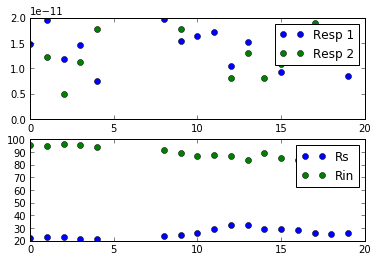

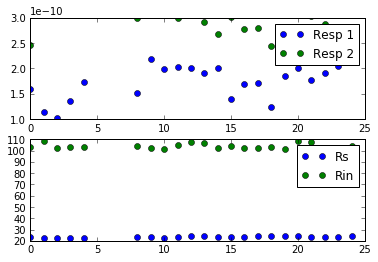

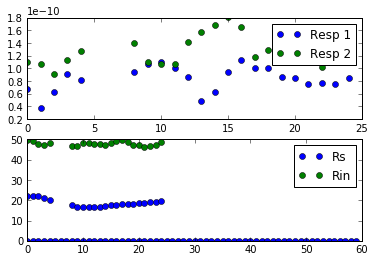

In [5]:
patch_pip.df_ana(data_asso_2Hz_reci,'/data/data_asso_2Hz_reci', end_ana=[50, 35, 16, 50, 30, 17, 25, 25])
asso_2Hz_reci = pd.read_pickle('/data/data_asso_2Hz_reci')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(asso_2Hz_reci)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [6]:
asso_2Hz_reci['Before'].index

Int64Index([139, 140, 141, 142, 143, 144, 145, 146], dtype='int64')

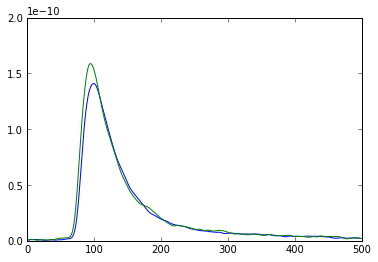

In [7]:
sample_id = 140
plt.plot(np.nanmean(np.vstack(asso_2Hz_reci['Before'].loc[sample_id]['trace_y1'])[:, :500], axis=0))
plt.plot(np.nanmean(np.vstack(asso_2Hz_reci['After'].loc[sample_id]['trace_y1'])[-5:,:500], axis=0))
plt.ylim([0, 2e-10])
with PdfPages('/data/Figure4_3.pdf') as pdf:
    pdf.savefig()

In [8]:
elimi = np.array([50, 35, 16, 50, 30, 17, 25, 25])
elimi_sr = pd.Series(elimi, index=asso_2Hz_reci.index)
asso_2Hz_reci['elimi']=elimi_sr
# asso_2Hz_reci.to_pickle('/data/ana_asso_2Hz_reci')